Saving iris (1).csv to iris (1) (6).csv
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
Chosen K: 11
Accuracy Score: 1.00

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



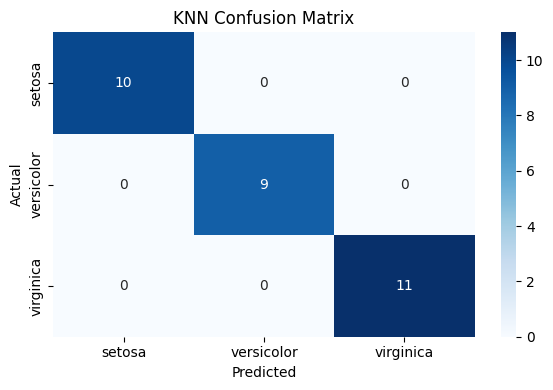

In [9]:
#Iris dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import files
# Upload the CSV file
uploaded = files.upload()
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(next(iter(uploaded)))  # Load the first uploaded file
print(df.head())
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

# Split features and target
X = df.drop('species', axis=1)
y = df['species']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose K using sqrt rule
k = int(math.sqrt(len(X_train)))
if k % 2 == 0:
    k += 1

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Accuracy and Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=le.classes_)

# Print results
print(f"Chosen K: {k}")
print(f"Accuracy Score: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.tight_layout()
plt.show()

Saving diabetes.csv to diabetes (1).csv
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Chosen K: 25
Accuracy Score: 0.74

Confusion Matrix:
[[86 13]
 [27 28]]


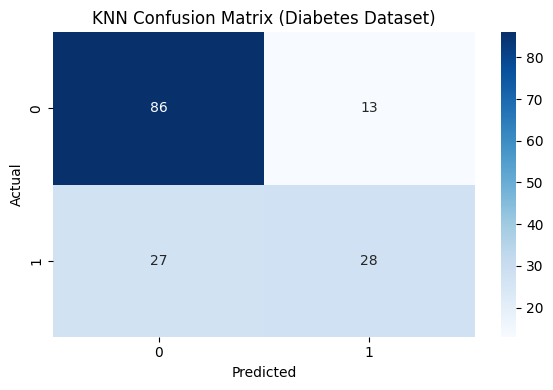

In [8]:
#diabetes dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
from google.colab import files
# Upload the CSV file
uploaded = files.upload()
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(next(iter(uploaded)))  # Load the first uploaded file
print(df.head())
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Split features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Choose k value (sqrt(n) rule of thumb)
k = int(math.sqrt(len(X_train)))
if k % 2 == 0:
    k += 1  # Prefer odd k to avoid ties

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Chosen K: {k}")
print(f"Accuracy Score: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix (Diabetes Dataset)")
plt.tight_layout()
plt.show()


Saving heart.csv to heart.csv
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


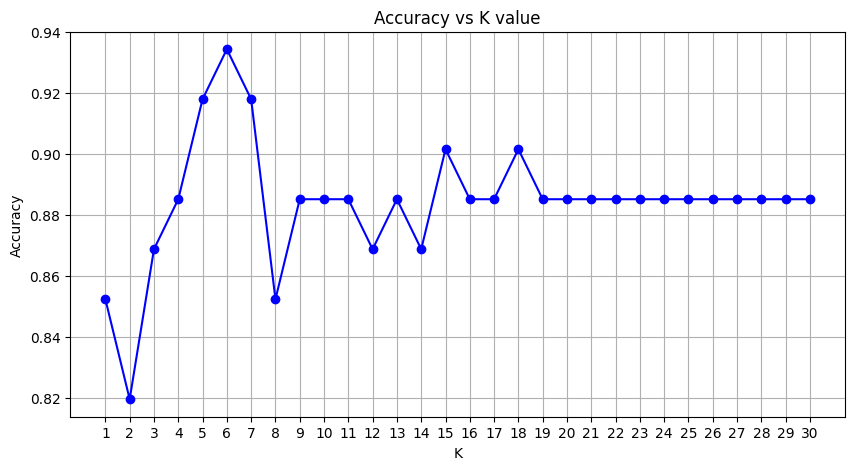


✅ Best K value: 6 with Accuracy: 0.9344


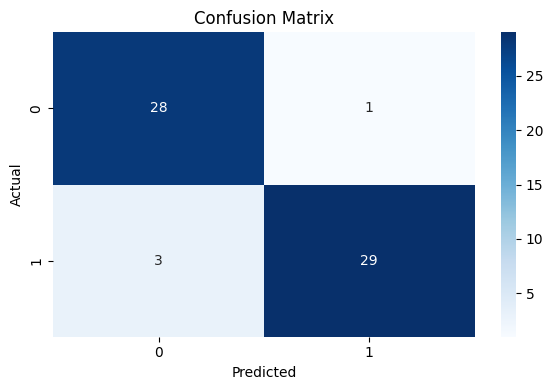


📊 Classification Report:
              precision    recall  f1-score   support

  No Disease       0.90      0.97      0.93        29
     Disease       0.97      0.91      0.94        32

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



In [11]:
#heart dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
import pandas as pd
from google.colab import files
# Upload the CSV file
uploaded = files.upload()
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(next(iter(uploaded)))  # Load the first uploaded file
print(df.head())

# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Find the best K by testing accuracy for multiple values
accuracy_scores = []
k_range = range(1, 31)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

# Plot Accuracy vs K
plt.figure(figsize=(10, 5))
plt.plot(k_range, accuracy_scores, marker='o', color='blue')
plt.title('Accuracy vs K value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Get the best K
best_k = k_range[np.argmax(accuracy_scores)]
print(f"\n✅ Best K value: {best_k} with Accuracy: {max(accuracy_scores):.4f}")

# Retrain model using the best K
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred_best = best_knn.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Classification Report
report = classification_report(y_test, y_pred_best, target_names=["No Disease", "Disease"])
print("\n📊 Classification Report:")
print(report)
